## Data Preprocess

In [9]:
# Import the libraries
import os
import numpy as np 
import pandas as pd 
import c_visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [37]:
# Change working directory
os.chdir('C:/Users/User/Desktop/Data&Code/Wealth/Wealth_2018')

In [16]:
# Create Product_sub_Category 
def Product_sub_Category(df, col1, col2, value):
    list = []
    for i, j in zip(df[col1], df[col2]):
        if i == value:
            list.append(j)
        else:
            list.append(i)
    return list

In [38]:
# Import Data
Wealth = pd.read_excel('WEALTH_2018_20200316_v2.xlsx')

# Create Product_sub_Category 
Wealth['Product_sub_Category'] = Wealth['Product_Category'] + '_' + Wealth['Risk_Grade']
Wealth['Product_Variable'] = Product_sub_Category(Wealth, 'Product_Category', 'Product_sub_Category', '國內投信基金')

# Group by created variables
bins = [0, 20, 40, 50, 60, 70, 120]
labels = ['0-19', '20-39', '40-49', '50-59', '60-69','70+']
Wealth_flat = Wealth.groupby(['Customer_ID','Product_Variable'])['Buy_Amount'].sum().unstack()
Wealth_flat['Buy_Amount'] = Wealth.groupby(['Customer_ID'])['Buy_Amount'].sum()
Wealth_flat['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_flat['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_flat.fillna(value=1, inplace=True)

# Age bin
Wealth_flat['Age_bins'] = pd.cut(x=Wealth_flat['Age'], bins = bins, labels = labels,include_lowest = True)
Wealth_flat.head()

Product_Variable,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age,Gender,Age_bins
Customer_ID,,,,,,,,,,,,
16302776,1.0,1.0,1.0,1.0,500000.0,1.0,1.0,1.0,500000.0,22,OTHER,20-39
28160034,1.0,1.0,1.0,1.0,8000.0,1.0,1.0,1.0,8000.0,14,OTHER,0-19
29538509,15000000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15000000.0,55,OTHER,50-59
84564116,1.0,1.0,1.0,1.0,500000.0,1.0,1.0,1.0,500000.0,27,OTHER,20-39
86408273,1.0,1.0,1.0,1820000.0,4140000.0,1.0,1.0,1.0,5960000.0,29,OTHER,20-39


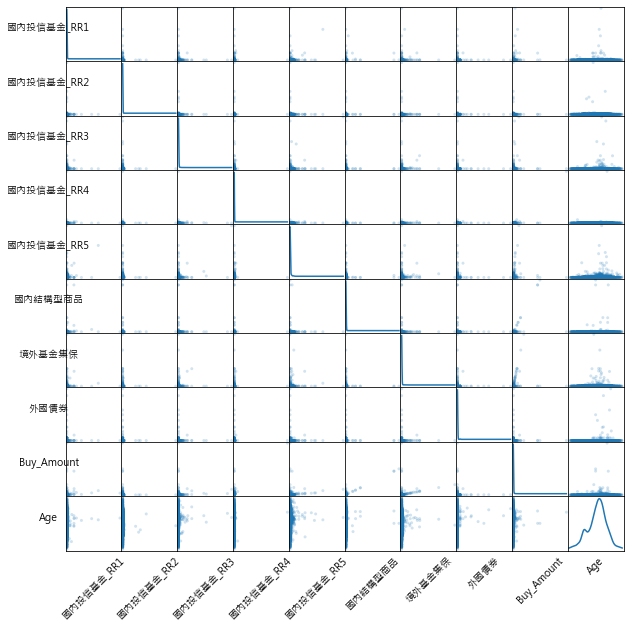

In [24]:
# Scatter_matrix plot of all features
wealth_flat_numeric = Wealth_flat.iloc[:,:-2]
sm = pd.plotting.scatter_matrix(wealth_flat_numeric, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Wealth_2018_Var.png')

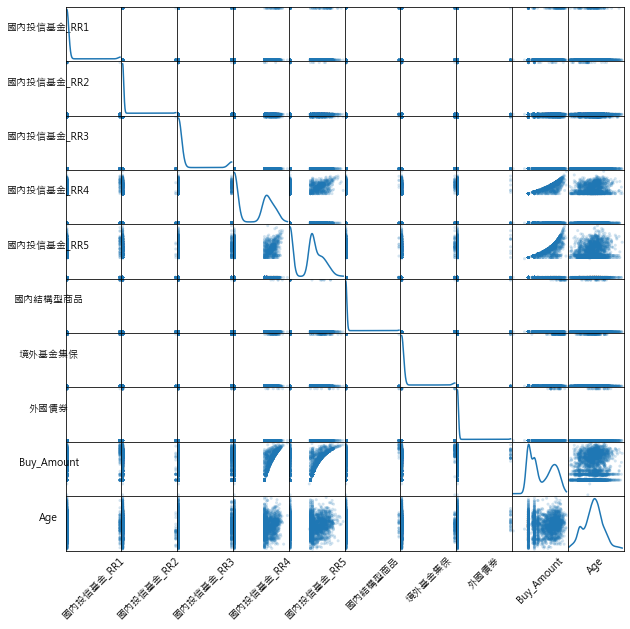

In [25]:
# Scale the data using the Box Cox method
from sklearn.preprocessing import PowerTransformer

bc = PowerTransformer(method='box-cox')
Wealth_scaled_features = bc.fit_transform(wealth_flat_numeric.values)
Wealth_scaled_features_df = pd.DataFrame(Wealth_scaled_features, index=wealth_flat_numeric.index,\
                                         columns=wealth_flat_numeric.columns)
sm = pd.plotting.scatter_matrix(Wealth_scaled_features_df, alpha=0.2, figsize=(10, 10), diagonal = 'kde')

# Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

# plt.show()
plt.savefig('Wealth_2018_Var_Norm.png')

In [4]:
# Age df
Age_df = Wealth_flat.groupby('Age_bins').size().to_frame(name = 'Size')
Age_df['Buy_Amount'] = Wealth_flat.groupby('Age_bins')['Buy_Amount'].sum()
Age_df

,Size,Buy_Amount
Age_bins,,
0-19,117,4.145797e+07
20-39,688,2.095774e+08
40-49,822,8.010578e+08
50-59,947,9.450942e+08
60-69,459,1.017278e+09
70+,157,5.395772e+07


Text(0.5, 1.0, 'Wealth_2018_Age_distribution')

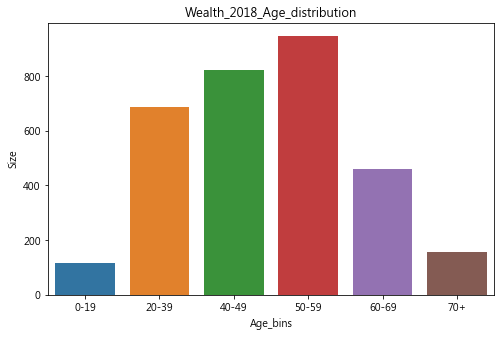

In [27]:
# Plot age distribution
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index,y = Age_df['Size'])
plt.title('Wealth_2018_Age_distribution')

Text(0.5, 1.0, 'Wealth_2018_Age_buy_amount')

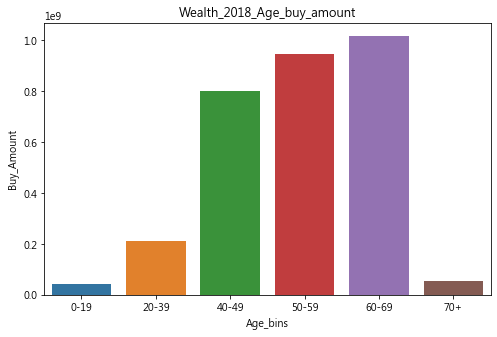

In [10]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,3))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount)
plt.title('Wealth_2018_Age_buy_amount')

Text(0.5, 1.0, 'Wealth_2018_Age_Average_buy_amount')

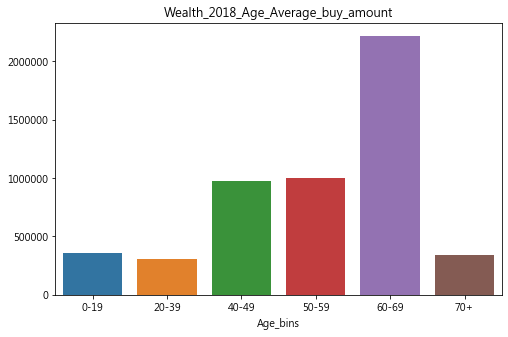

In [11]:
# Age_bin vs. Buy_amount barplot
plt.figure(figsize = (8,5))
sns.barplot(x = Age_df.index, y = Age_df.Buy_Amount / Age_df.Size)
plt.title('Wealth_2018_Age_Average_buy_amount')

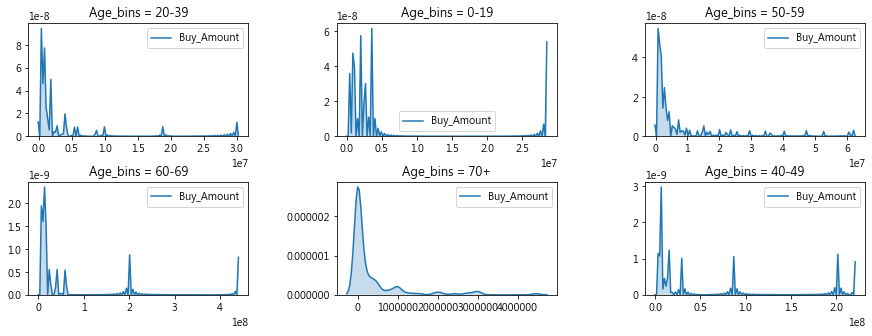

In [12]:
# Age bin kde plot
fig , ax = plt.subplots(figsize = (15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i,j in enumerate(Wealth_flat.Age_bins.unique()):
    plt.subplot(2, 3, i+1)
    filter_ = Wealth_flat['Age_bins'] == j
    sns.kdeplot(Wealth_flat.loc[filter_].Buy_Amount, shade=True)
    plt.title("Age_bins = {}" .format(j))

In [22]:
# # Split Data
# Age_Threshold_1 = 40 
# Age_Threshold_2 = 60
# Age_filter = Wealth['Age'] < Age_Threshold_1
# dirName_1 = 'C:/Users/user/Desktop/Data/Wealth/2019/Wealth_Young'
# dirName_2 = 'C:/Users/user/Desktop/Data/Wealth/2019/Wealth_Old'
# os.mkdir(dirName_1)
# os.mkdir(dirName_2)

# Wealth[Age_filter].to_excel(dirName_1 + '/Wealth_Young.xlsx')
# Wealth[~Age_filter].to_excel(dirName_2 + '/Wealth_Old.xlsx')

## Outlier Detection

In [74]:
# Outlier detection
import xlsxwriter

# Create a new df with the descriptive features
Wealth_feat_w_prop_df = wealth_flat_numeric
Wealth_feat_w_prop_df['Customer_Name'] = Wealth.groupby(['Customer_ID'])['Customer_Name'].first()
Wealth_feat_w_prop_df['Age'] = Wealth.groupby(['Customer_ID'])['Age'].first()
Wealth_feat_w_prop_df['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_feat_w_prop_df['Constellation'] = Wealth.groupby(['Customer_ID'])['Constellation'].first()
Wealth_feat_w_prop_df['Buy_Amount'] = Wealth.groupby(['Customer_ID'])['Buy_Amount'].sum()
Wealth_feat_w_prop_df['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_feat_w_prop_df['Sales_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_feat_w_prop_df['Sales_Name'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()

feature_outliers = []
writer = pd.ExcelWriter('Wealth_2018_Outliers_sheets.xlsx', engine='xlsxwriter')

for feature in Wealth_scaled_features_df.keys():
    Q1 = np.percentile(Wealth_scaled_features_df[feature], 25)
    Q3 = np.percentile(Wealth_scaled_features_df[feature], 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((Wealth_scaled_features_df[feature] >= Q1 - step)&\
                       (Wealth_scaled_features_df[feature] <= Q3 + step))
    Wealth_feat_w_prop_df.loc[Wealth_scaled_features_df.loc[Outlier_Index].index,:].groupby(['Customer_ID']).first()\
    .to_excel(writer, sheet_name = feature)
    feature_outliers.append(Wealth_feat_w_prop_df.loc[Wealth_scaled_features_df.loc[Outlier_Index].index,:])
writer.save()

# Flatten list of outliers
outliers_flattened = []

for i, j in enumerate(feature_outliers):
    outliers_flattened.append(feature_outliers[i].index)
flat_list = [item for sublist in outliers_flattened for item in sublist]

# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(flat_list)
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 3]
Wealth_feat_w_prop_df.loc[Wealth_scaled_features_df.loc[outliers].index,:].groupby(['Customer_ID']).first()\
.to_csv('Wealth_2018_Outliers.csv', encoding='utf_8_sig')

## PCA vs. SVD

,Explained Var,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age
Dim 1,0.1652,0.2504,-0.1486,0.0596,0.0808,0.4538,0.2146,0.3447,0.1621,0.6866,0.1914
Dim 2,0.1258,0.2945,0.0553,0.1437,0.5605,-0.6468,0.2765,0.2220,0.1339,0.0530,-0.1035
Dim 3,0.1173,0.4123,0.3321,0.1813,-0.6230,-0.0203,0.4563,0.0498,0.1517,-0.1547,-0.2016
Dim 4,0.1095,0.3165,-0.0322,-0.6673,0.1798,0.1212,0.3828,-0.3800,-0.3356,-0.0004,-0.0533
Dim 5,0.1073,-0.0526,-0.3970,0.0665,-0.0957,-0.1490,0.3017,-0.3678,0.4131,-0.1432,0.6216
Dim 6,0.0994,-0.2716,0.5292,-0.5087,0.0574,-0.0030,-0.0271,0.0767,0.6091,0.0661,0.0465
Dim 7,0.0912,0.0029,0.6375,0.2539,0.0992,-0.0189,0.0112,-0.1851,-0.3844,0.1388,0.5635
Dim 8,0.0838,0.3472,-0.0858,-0.3577,-0.1923,-0.1502,-0.2882,0.5560,-0.1393,-0.2727,0.4458
Dim 9,0.0789,-0.6169,-0.0654,-0.0948,-0.1120,-0.0998,0.5602,0.4092,-0.3153,-0.0218,0.0498
Dim 10,0.0217,0.0522,0.0884,0.1817,0.4325,0.5528,0.1845,0.1817,0.1094,-0.6188,0.0433


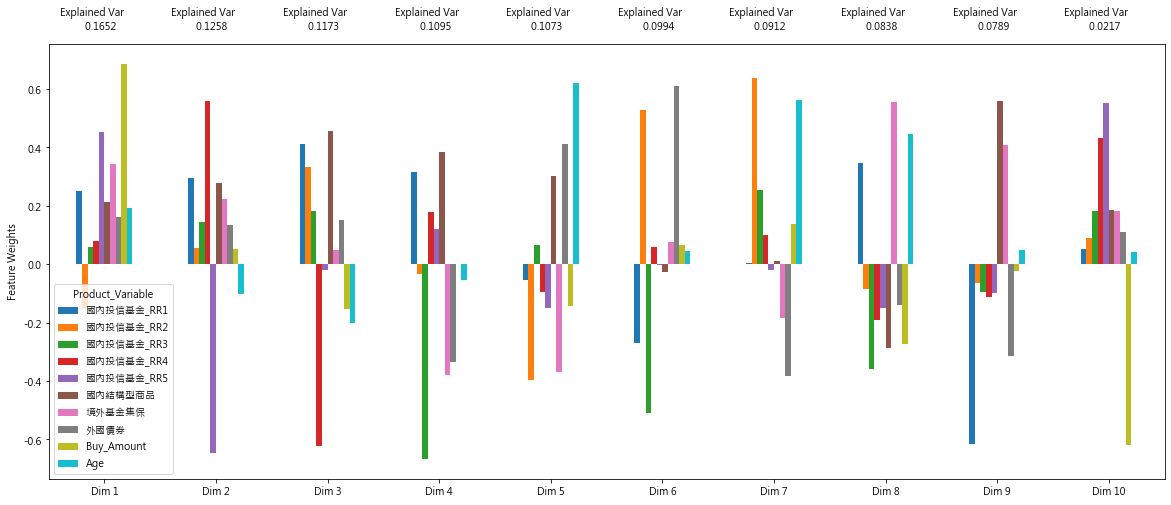

In [51]:
# PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Wealth_scaled_features_df.shape[1]
pca = PCA(n_components = num_features, random_state = 0)
pca = pca.fit(Wealth_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Wealth_scaled_features_df, pca)

,Explained Var,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age
Dim 1,0.1652,0.2504,-0.1486,0.0596,0.0808,0.4538,0.2146,0.3447,0.1621,0.6866,0.1914
Dim 2,0.1258,0.2945,0.0553,0.1437,0.5605,-0.6468,0.2765,0.2220,0.1339,0.0530,-0.1035
Dim 3,0.1173,0.4123,0.3321,0.1813,-0.6230,-0.0203,0.4563,0.0498,0.1517,-0.1547,-0.2016
Dim 4,0.1095,0.3165,-0.0322,-0.6673,0.1798,0.1212,0.3828,-0.3800,-0.3356,-0.0004,-0.0533
Dim 5,0.1073,-0.0526,-0.3970,0.0665,-0.0957,-0.1490,0.3017,-0.3678,0.4131,-0.1432,0.6216
Dim 6,0.0994,-0.2716,0.5292,-0.5087,0.0574,-0.0030,-0.0271,0.0767,0.6091,0.0661,0.0465
Dim 7,0.0912,0.0029,0.6375,0.2539,0.0992,-0.0189,0.0112,-0.1851,-0.3844,0.1388,0.5635
Dim 8,0.0838,0.3472,-0.0858,-0.3577,-0.1923,-0.1502,-0.2882,0.5560,-0.1393,-0.2727,0.4458
Dim 9,0.0789,-0.6169,-0.0654,-0.0948,-0.1120,-0.0998,0.5602,0.4092,-0.3153,-0.0218,0.0498


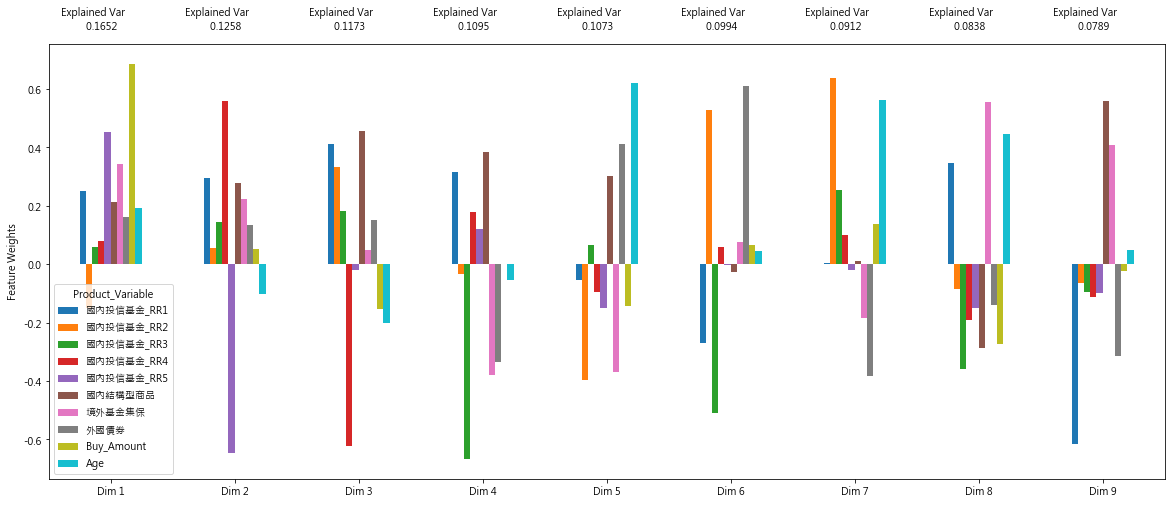

In [54]:
# SVD
from sklearn.decomposition import TruncatedSVD

# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Wealth_scaled_features_df.shape[1] - 1
svd = TruncatedSVD(n_components = num_features, random_state = 0)
svd = svd.fit(Wealth_scaled_features_df)

# Transform log_samples using the PCA fit above

# Generate PCA results plot
vs.pca_results(Wealth_scaled_features_df, svd)

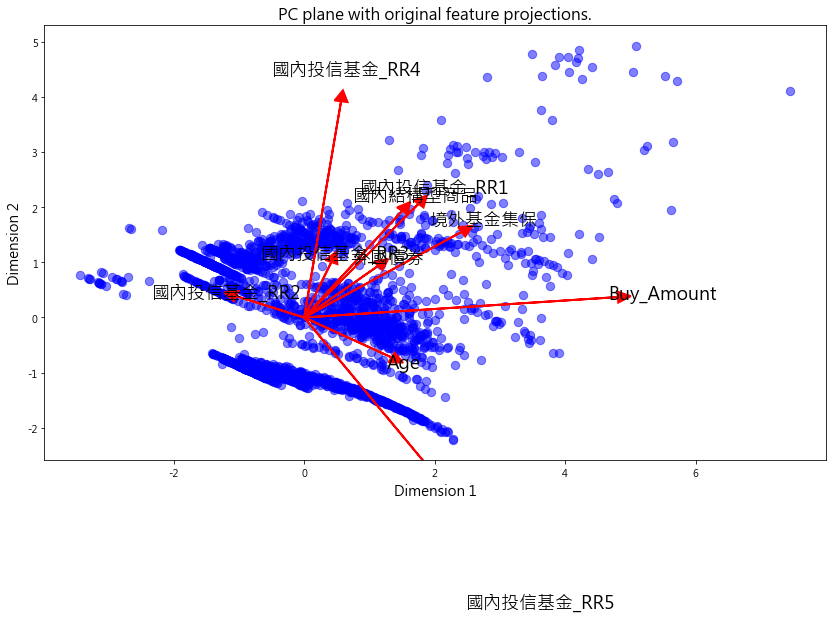

In [55]:
# Apply PCA by fitting data with only 2 Dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Wealth_scaled_features_df)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Wealth_scaled_features_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

vs.biplot(Wealth_scaled_features_df ,reduced_data, pca)

## K means Clustering

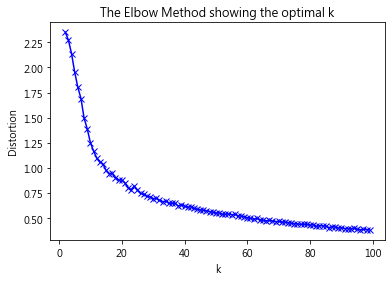

In [56]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(2,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Wealth_scaled_features_df)
    distortions.append(sum(np.min(cdist(Wealth_scaled_features_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / \
                       Wealth_scaled_features_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

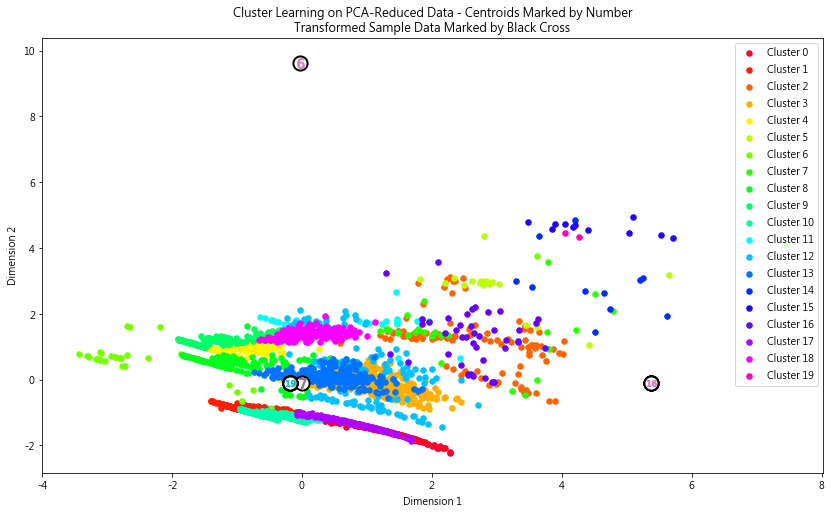

In [57]:
# Clustering(Elbow_method)
optimized_kmeans = KMeans(n_clusters = 20, random_state = 0).fit(Wealth_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Wealth_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

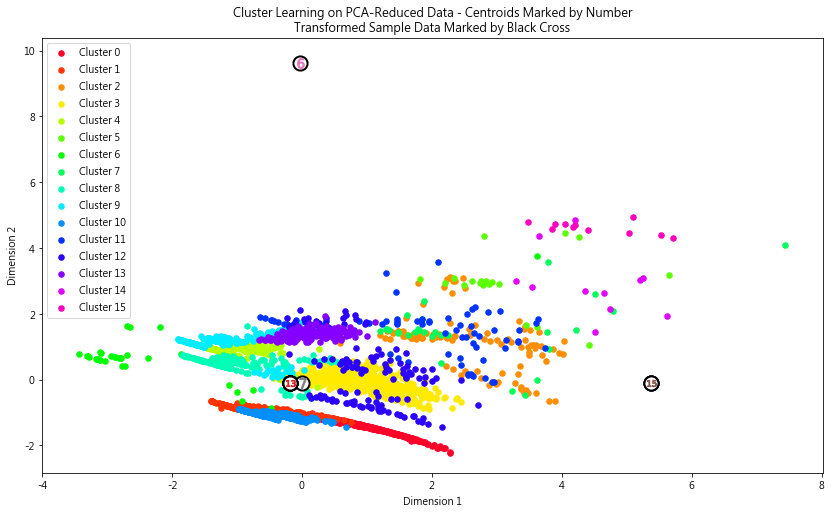

In [58]:
# Clustering(silhouette_score method)
# silhouette_score method
num_clusters = np.arange(2,30)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(Wealth_scaled_features_df)
    preds = kmeans.predict(Wealth_scaled_features_df)
    kmeans_results[size] = metrics.silhouette_score(Wealth_scaled_features_df, preds)
    
best_size = max(kmeans_results, key = kmeans_results.get)

optimized_kmeans = KMeans(n_clusters = best_size, random_state = 0).fit(Wealth_scaled_features_df)
kmeans_preds = optimized_kmeans.predict(Wealth_scaled_features_df)
kmeans_centers = optimized_kmeans.cluster_centers_
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers)

For n_clusters = 2 The average silhouette_score is : 0.21901510111481778
For n_clusters = 3 The average silhouette_score is : 0.23287957438564957
For n_clusters = 4 The average silhouette_score is : 0.2418410189546858
For n_clusters = 5 The average silhouette_score is : 0.3100945253787412
For n_clusters = 6 The average silhouette_score is : 0.31852791074719855
For n_clusters = 7 The average silhouette_score is : 0.33797665741845745
For n_clusters = 8 The average silhouette_score is : 0.35898269803842836
For n_clusters = 9 The average silhouette_score is : 0.398021244411023
For n_clusters = 10 The average silhouette_score is : 0.4179887012442173
For n_clusters = 11 The average silhouette_score is : 0.40471576957871336
For n_clusters = 12 The average silhouette_score is : 0.40301169579398644
For n_clusters = 13 The average silhouette_score is : 0.4105449890994966
For n_clusters = 14 The average silhouette_score is : 0.435507752680248
For n_clusters = 15 The average silhouette_score is : 

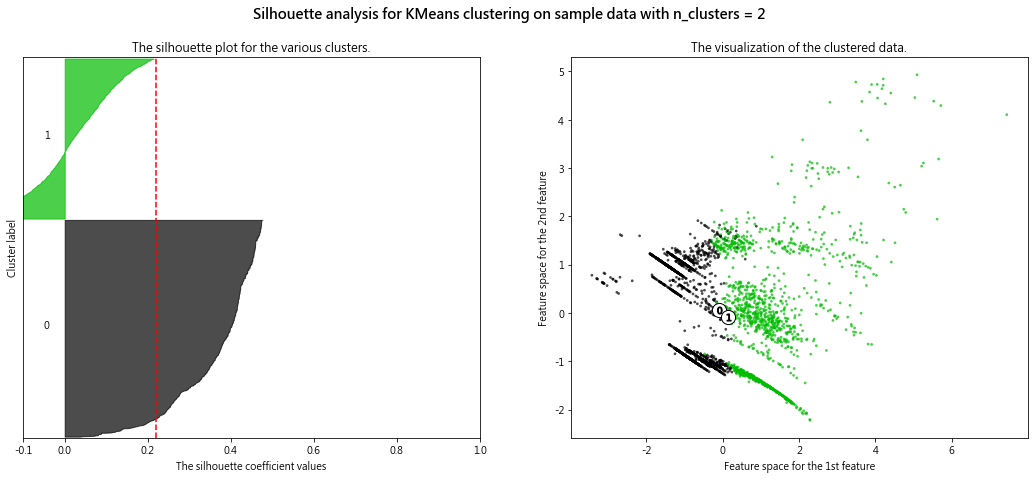

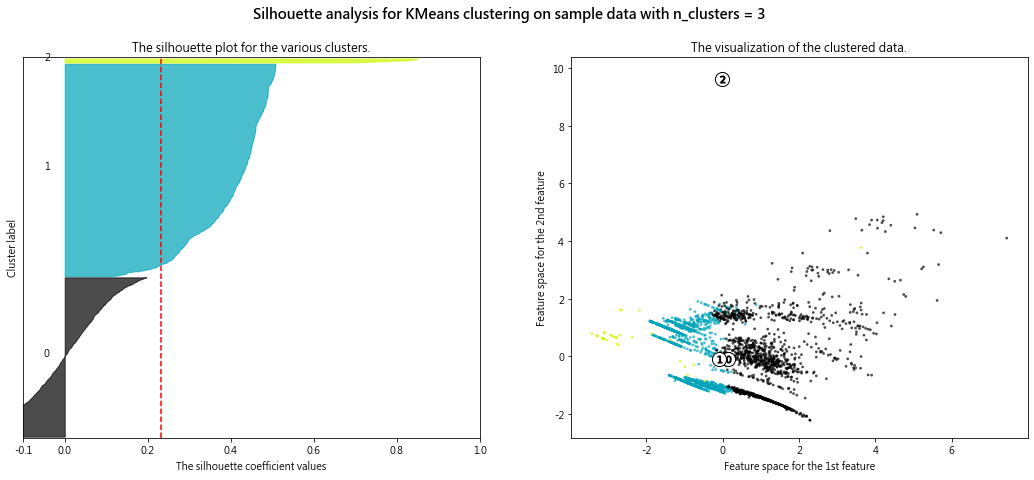

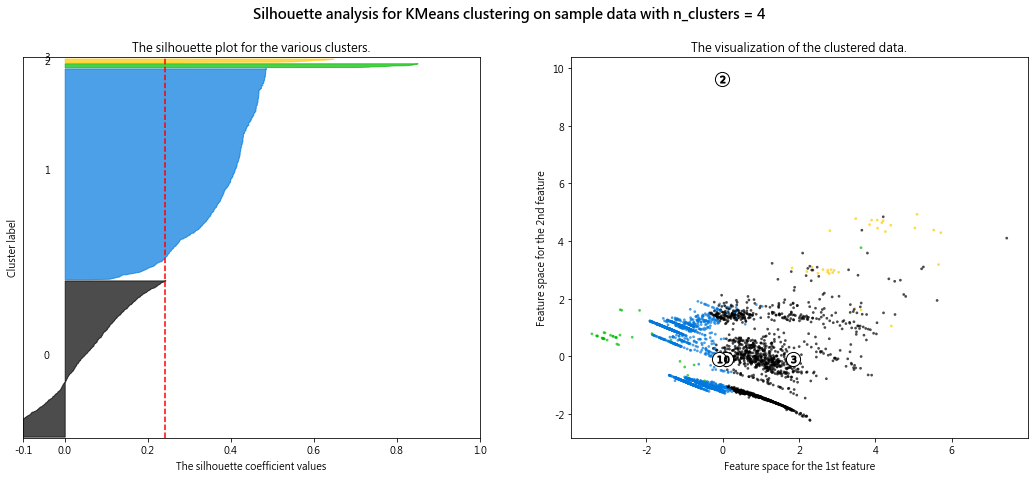

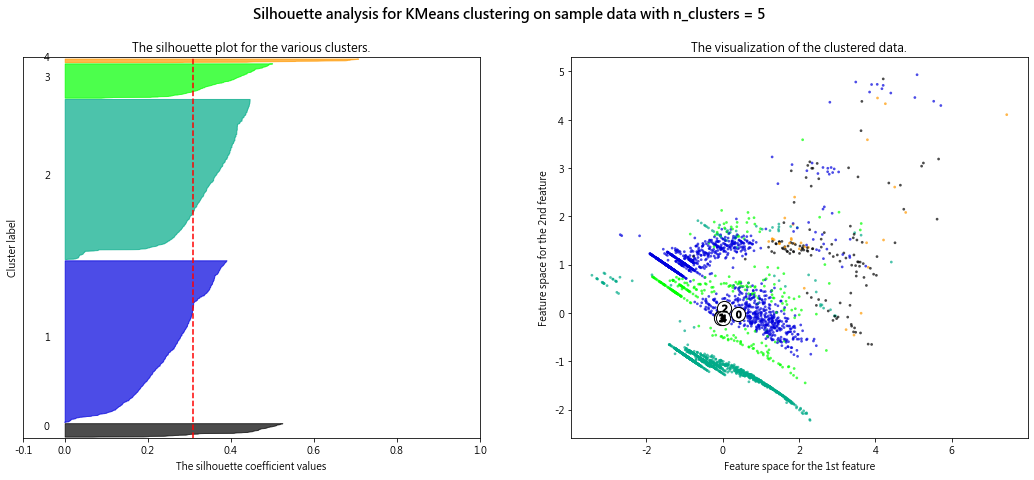

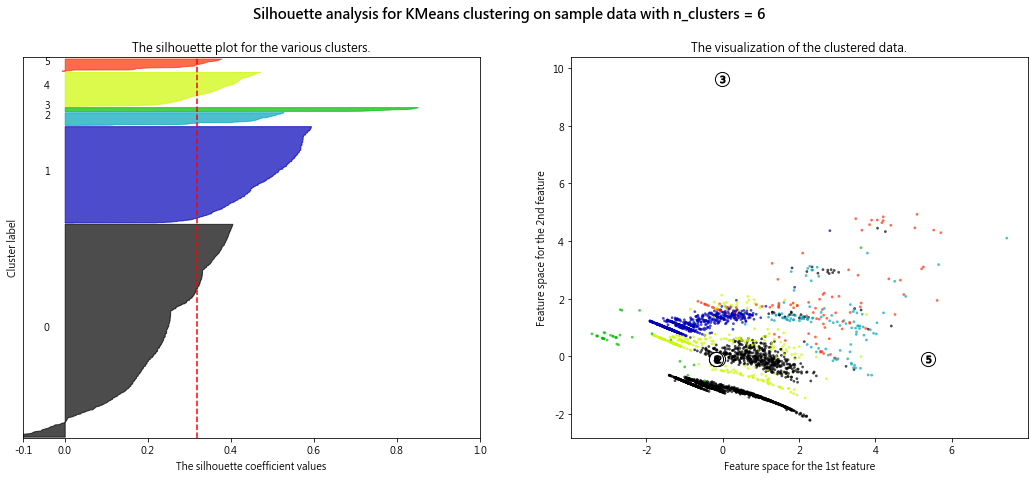

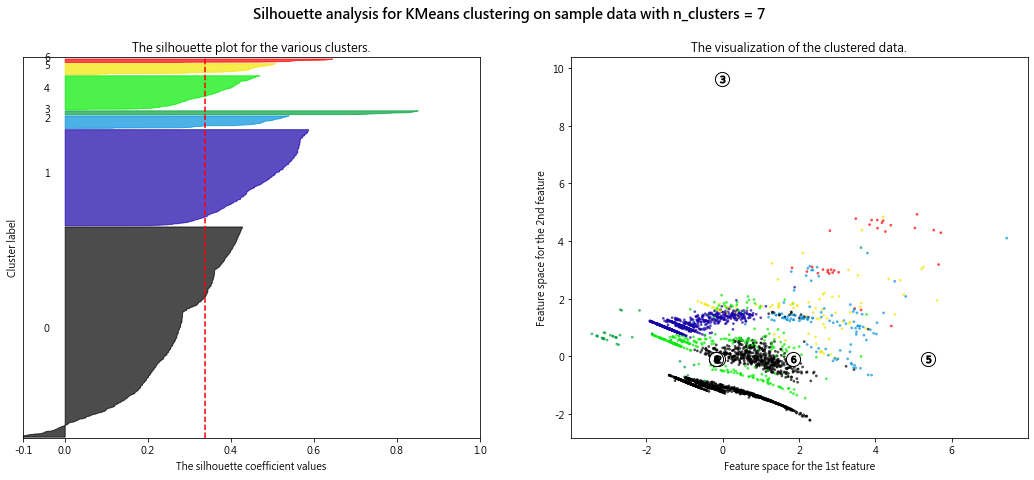

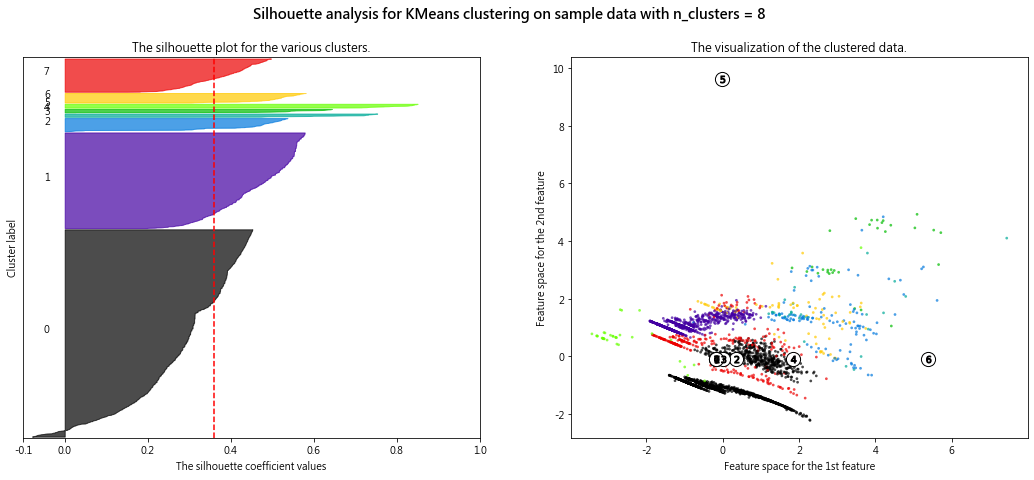

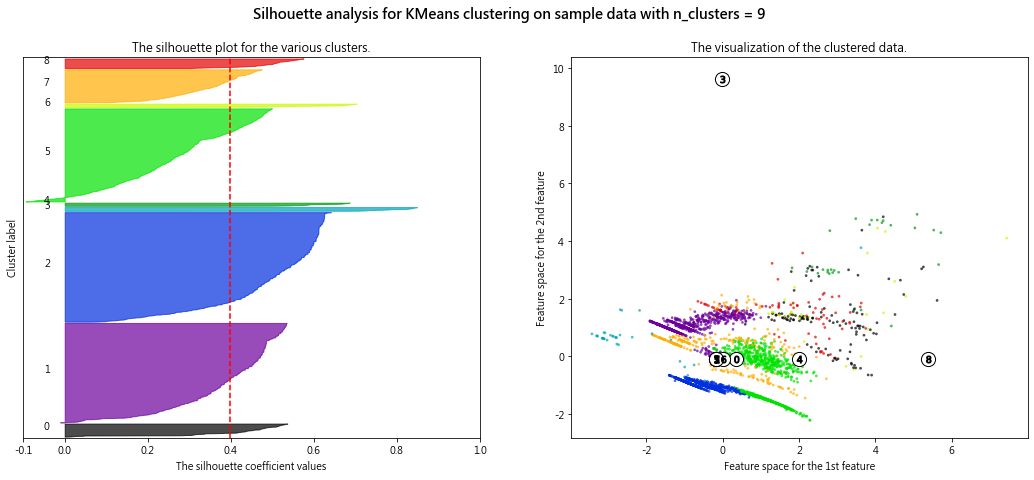

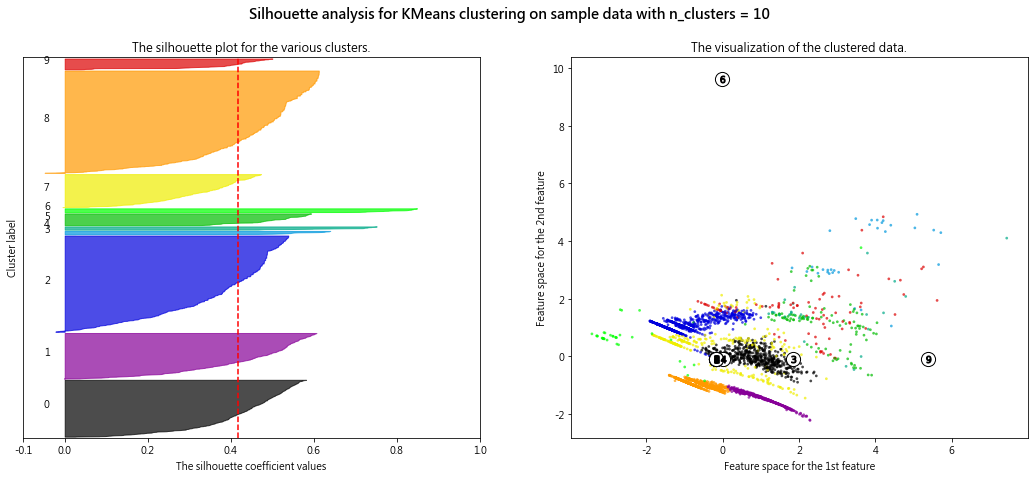

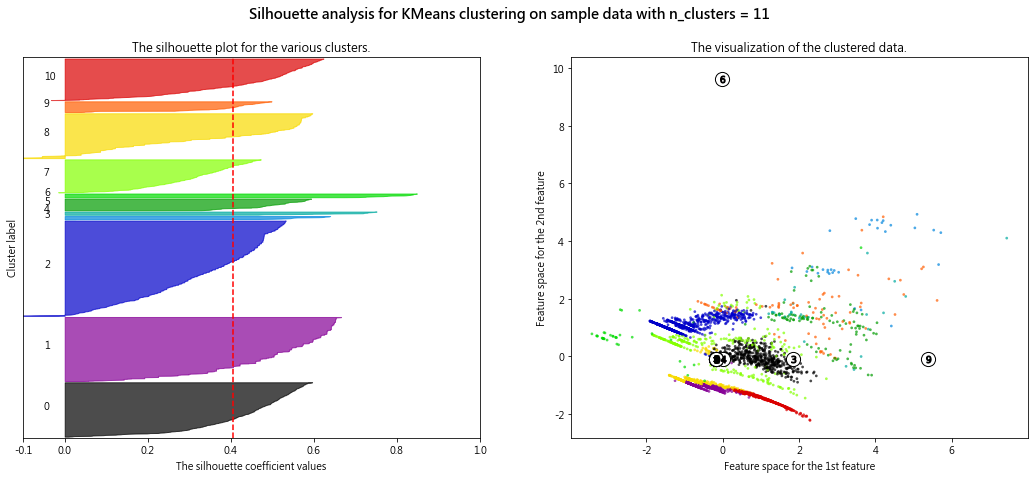

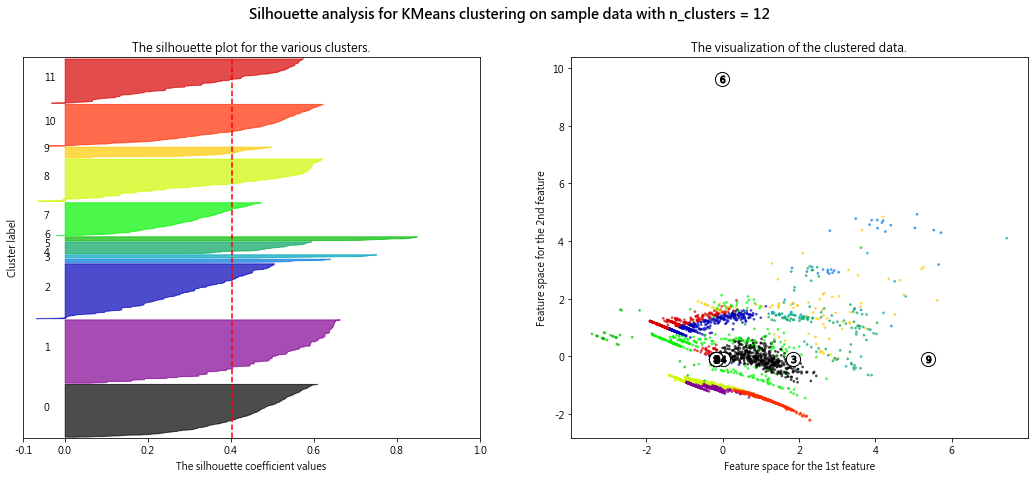

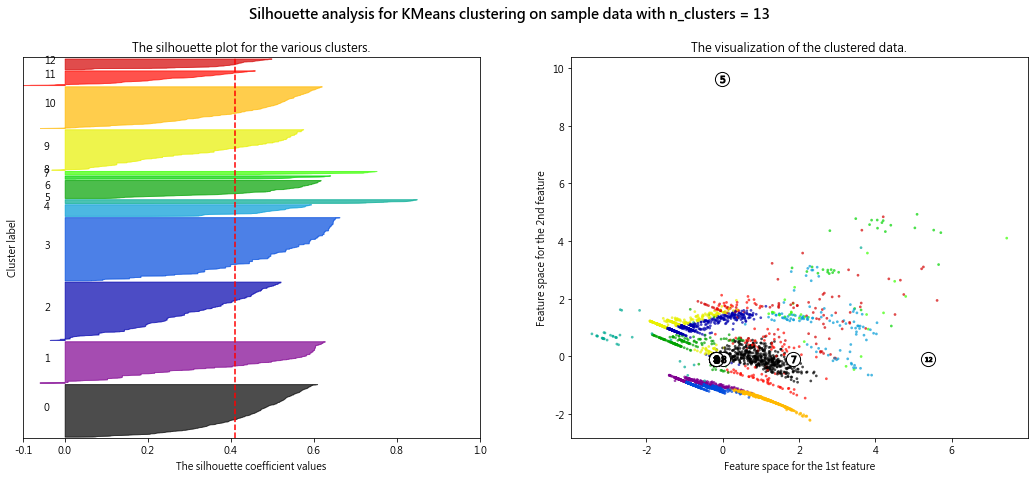

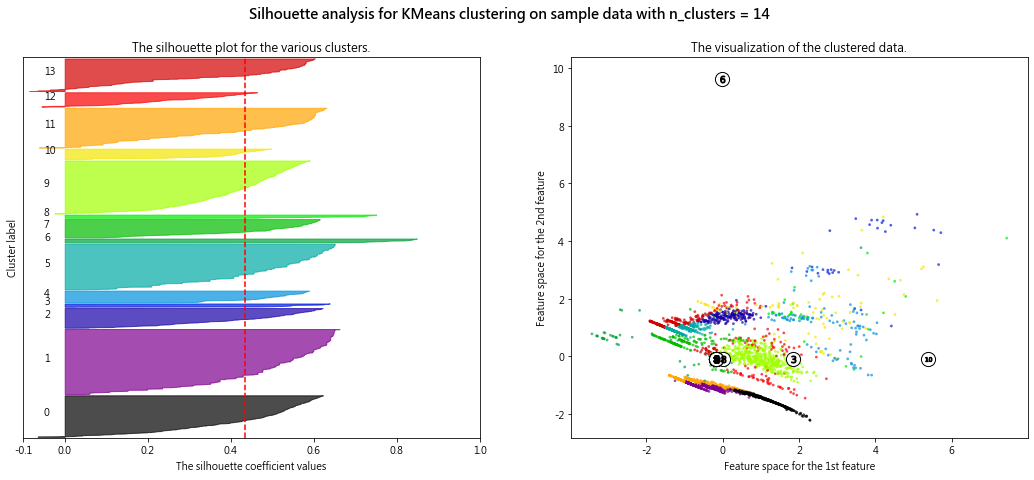

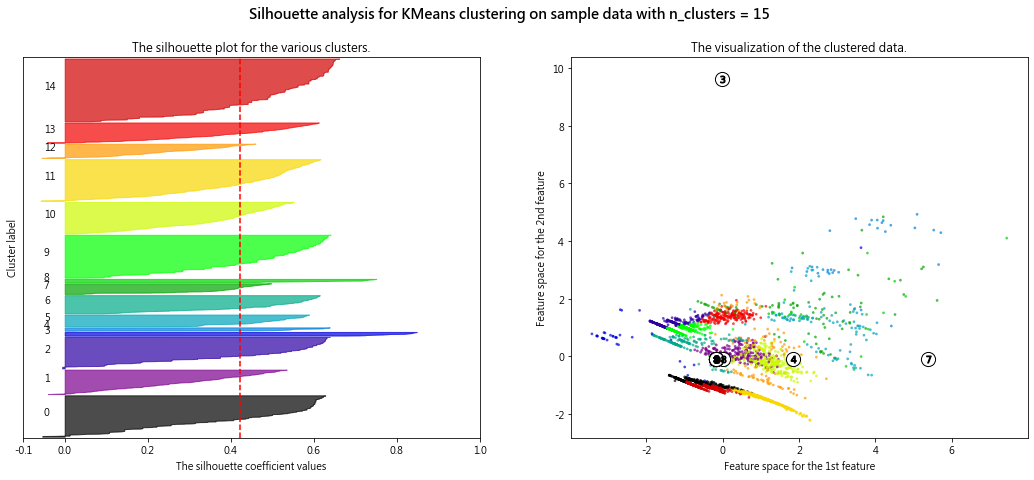

In [71]:
# silhouette_score plot
import clust_visuals as vs
vs.Silhouette_score(r = 16, df = Wealth_scaled_features_df, reduced_df = reduced_data)
plt.savefig('Wealth_2018'+ '_Silhouette_score' + '.png')

## K Prototype Clustering

In [79]:
Wealth_scaledfeat_w_prop_df = Wealth_scaled_features_df
Wealth_scaledfeat_w_prop_df['Age_bins'] = Wealth_flat['Age_bins']
Wealth_scaledfeat_w_prop_df['Gender'] = Wealth.groupby(['Customer_ID'])['Gender'].first()
Wealth_scaledfeat_w_prop_df['Constellation'] = Wealth.groupby(['Customer_ID'])['Constellation'].first()
Wealth_scaledfeat_w_prop_df['Com_ID'] = Wealth.groupby(['Customer_ID'])['Com_ID'].first()
Wealth_scaledfeat_w_prop_df['Sales_ID'] = Wealth.groupby(['Customer_ID'])['Sales_ID'].first()
Wealth_scaledfeat_w_prop_df.head()

Product_Variable,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age,Gender,Constellation,Com_ID,Sales_ID,Age_bins
Customer_ID,,,,,,,,,,,,,,,
16302776,-0.186297,-0.103794,-0.335072,-0.927651,1.397533,-0.097435,-0.198561,-0.099062,1.266013,22,OTHER,雙魚座,585M,585M,20-39
28160034,-0.186297,-0.103794,-0.335072,-0.927651,0.435991,-0.097435,-0.198561,-0.099062,-0.436526,14,OTHER,金牛座,5855,5855,0-19
29538509,5.367782,-0.103794,-0.335072,-0.927651,-1.222633,-0.097435,-0.198561,-0.099062,1.848609,55,OTHER,天秤座,5850,5850,50-59
84564116,-0.186297,-0.103794,-0.335072,-0.927651,1.397533,-0.097435,-0.198561,-0.099062,1.266013,27,OTHER,天秤座,5854,5854,20-39
86408273,-0.186297,-0.103794,-0.335072,1.587507,1.946751,-0.097435,-0.198561,-0.099062,1.732401,29,OTHER,射手座,5855,5855,20-39


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 768, ncost: 115945.814882111
Run: 1, iteration: 2/100, moves: 248, ncost: 115041.40373572396
Run: 1, iteration: 3/100, moves: 188, ncost: 114666.97139428747
Run: 1, iteration: 4/100, moves: 162, ncost: 113839.07584025778
Run: 1, iteration: 5/100, moves: 230, ncost: 112900.66096358161
Run: 1, iteration: 6/100, moves: 75, ncost: 112786.64019467244
Run: 1, iteration: 7/100, moves: 53, ncost: 112720.02670066911
Run: 1, iteration: 8/100, moves: 52, ncost: 112678.26095627919
Run: 1, iteration: 9/100, moves: 37, ncost: 112653.8584219792
Run: 1, iteration: 10/100, moves: 63, ncost: 112548.015415766
Run: 1, iteration: 11/100, moves: 149, ncost: 111492.56547618887
Run: 1, iteration: 12/100, moves: 170, ncost: 110814.15080126545
Run: 1, iteration: 13/100, moves: 101, ncost: 110642.1232489443
Run: 1, iteration: 14/100, moves: 43, ncost: 110569.40219083652
Run: 1, iteration: 15/100, move

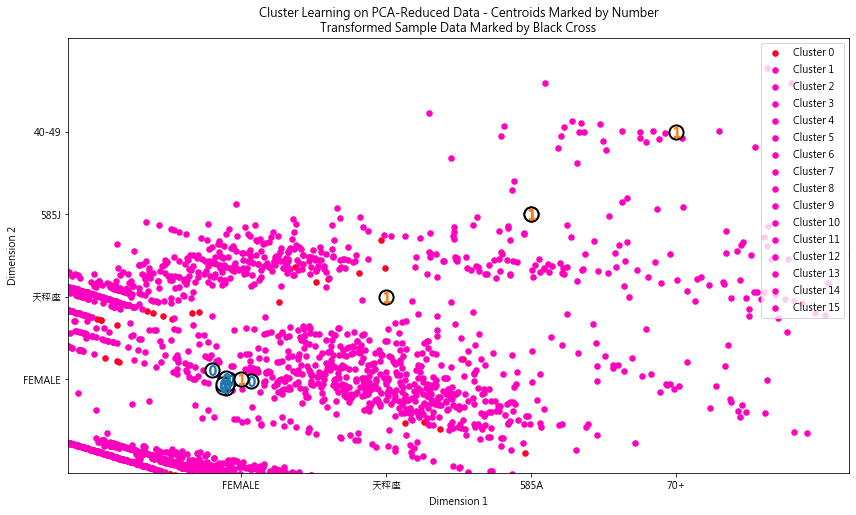

In [107]:
from kmodes.kprototypes import KPrototypes

# K Prototype Clustering
kproto = KPrototypes(n_clusters = best_size, init='Cao', verbose=2)
kproto_preds = kproto.fit_predict(Wealth_scaledfeat_w_prop_df, categorical=[10, 11, 12, 13, 14])
kproto_centers = kproto.cluster_centroids_
vs.cluster_results(reduced_data, kproto_preds, kproto_centers)

## Data Recovery

In [102]:
## K means
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kmeans_centers)
true_centers[np.isnan(true_centers)] = 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = Wealth_scaled_features_df.iloc[:,:10].keys())
true_centers.index = segments
display(true_centers)

# Segment mean
Wealth_flat['Label'] = optimized_kmeans.labels_
display(round(Wealth_flat.groupby('Label').mean()))

Product_Variable,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age
Segment 0,1.0,1.0,1.0,1.0,244494.0,1.0,1.0,1.0,195689.0,54.0
Segment 1,1.0,1.0,1.0,1.0,5967.0,1.0,1.0,1.0,5422.0,32.0
Segment 2,1.0,1.0,1.0,35.0,742.0,1.0,7665.0,1.0,759634.0,48.0
Segment 3,1.0,1.0,1.0,46063.0,61051.0,1.0,1.0,1.0,134308.0,50.0
Segment 4,1.0,1.0,1.0,4303.0,1.0,1.0,1.0,1.0,4305.0,58.0
Segment 5,1.0,1.0,1.0,2.0,22.0,191.0,1.0,1.0,2969430.0,54.0
Segment 6,1.0,1.0,1.0,2.0,8.0,1.0,1.0,1.0,8703.0,38.0
Segment 7,1.0,1.0,1.0,8.0,153.0,1.0,1.0,66.0,312722.0,58.0
Segment 8,1.0,1.0,4635.0,1.0,2.0,1.0,1.0,1.0,6502.0,49.0
Segment 9,1.0,1.0,1.0,5371.0,3.0,1.0,1.0,1.0,5449.0,31.0


Product_Variable,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age
Label,,,,,,,,,,
0,1.0,1.0,1.0,1.0,657070.0,1.0,1.0,1.0,657070.0,54.0
1,1.0,1.0,1.0,9.0,11182.0,1.0,1.0,1.0,11190.0,31.0
2,1.0,1.0,14603.0,133275.0,177719.0,1.0,4922043.0,1.0,5247637.0,47.0
3,1.0,1.0,1.0,274759.0,313340.0,1.0,1.0,1.0,588099.0,50.0
4,1.0,1.0,1.0,4947.0,85.0,1.0,1.0,1.0,5031.0,58.0
5,1.0,1.0,54633.0,48178.0,94667.0,22616247.0,87056.0,30264.0,22931040.0,54.0
6,26117.0,35464.0,7095.0,9393.0,18420.0,1.0,397177.0,1.0,493662.0,38.0
7,70741.0,1.0,71364.0,577281.0,576291.0,1.0,856120.0,339667.0,2491460.0,58.0
8,1.0,1.0,56466.0,115.0,311.0,1.0,1.0,1.0,56890.0,48.0


In [291]:
## K mode
# Inverse transform the box-cox centers
true_centers = bc.inverse_transform(kproto_centers[0])
true_centers[np.isnan(true_centers)] = 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = Wealth_scaled_features_df.iloc[:,:10].keys())
true_centers.index = segments
display(true_centers)

# Segment mean
Wealth_flat['Label'] = kproto.labels_
display(round(Wealth_flat.groupby('Label').mean()))

Product_Variable,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age
Segment 0,1.0,1.0,1.0,26.0,578.0,1.0,1.0,1.0,13495.0,697.0
Segment 1,1.0,1.0,1.0,29.0,944.0,1.0,1.0,1.0,15150.0,431.0
Segment 2,1.0,1.0,1.0,68.0,1428.0,1.0,1.0,1.0,25359.0,456.0
Segment 3,1.0,1.0,1.0,40.0,1426.0,1.0,1.0,1.0,13731.0,476.0
Segment 4,1.0,1.0,1.0,49.0,1476.0,1.0,1.0,1.0,15891.0,567.0
Segment 5,1.0,1.0,1.0,61.0,1060.0,1.0,1.0,1.0,23576.0,509.0
Segment 6,1.0,1.0,1.0,52.0,1146.0,1.0,1.0,1.0,20989.0,635.0
Segment 7,1.0,1.0,1.0,118.0,410.0,1.0,1.0,1.0,13203.0,372.0
Segment 8,1.0,1.0,1.0,2.0,19.0,1.0,1.0,1.0,10613.0,398.0
Segment 9,1.0,1.0,1.0,29.0,413.0,1.0,1.0,1.0,8492.0,294.0


Product_Variable,國內投信基金_RR1,國內投信基金_RR2,國內投信基金_RR3,國內投信基金_RR4,國內投信基金_RR5,國內結構型商品,境外基金集保,外國債券,Buy_Amount,Age
Label,,,,,,,,,,
0,62.0,1.0,6940.0,108679.0,208999.0,1.0,1.0,1.0,324676.0,82.0
1,4167.0,1.0,4507.0,42088.0,73807.0,7750.0,404069.0,1047.0,537430.0,43.0
2,22501.0,1.0,29368.0,67996.0,128674.0,1696448.0,238603.0,4180.0,2187764.0,46.0
3,5972.0,1.0,10388.0,44795.0,107984.0,1.0,45881.0,3086.0,218101.0,49.0
4,8625.0,898.0,55171.0,2084799.0,326936.0,38373.0,16284.0,1.0,2531081.0,62.0
5,117493.0,27.0,86567.0,249491.0,377638.0,314427.0,201834.0,5938.0,1353409.0,54.0
6,4259.0,1.0,40437.0,91612.0,197662.0,1.0,1.0,21148.0,355114.0,73.0
7,298.0,1.0,1229.0,78913.0,65027.0,1.0,101060.0,1.0,246523.0,35.0
8,36999.0,40283.0,10051.0,13057.0,26094.0,1.0,562666.0,1.0,689146.0,38.0


In [290]:
# Save Customer list 
Wealth_flat.loc[:,['Age', 'Gender', 'Label']].to_excel('Wealth_2018_Customer_list.xlsx')

## ANOVA test (k means only)

In [182]:
# ANOVA test
import scipy.stats as ss
Wealth_flat_t = Wealth_flat.drop(['Gender','Age_bins'], axis = 1)
for Variable in Wealth_flat_t.keys():
    samples = [val[1] for val in Wealth_flat_t.groupby('Label')[Variable]]
    f_val, p_val = ss.f_oneway(*samples)
    print('Variable: {}, F value: {:.3f}, p value: {:.3f}'.format(Variable, f_val, p_val))

Variable: 國內投信基金_RR1, F value: 1.560, p value: 0.077
Variable: 國內投信基金_RR2, F value: 31.731, p value: 0.000
Variable: 國內投信基金_RR3, F value: 0.992, p value: 0.460
Variable: 國內投信基金_RR4, F value: 0.899, p value: 0.565
Variable: 國內投信基金_RR5, F value: 1.852, p value: 0.023
Variable: 國內結構型商品, F value: 1.428, p value: 0.125
Variable: 境外基金集保, F value: 1.058, p value: 0.391
Variable: 外國債券, F value: 1.257, p value: 0.221
Variable: Buy_Amount, F value: 1.074, p value: 0.376
Variable: Age, F value: 13222.484, p value: 0.000
Variable: Label, F value: 1025089640107815424.000, p value: 0.000


In [287]:
# T test with onw population mean
mean_list = list(Wealth_flat.mean())
Segment = []
Var = []
T_test = []

for index_1, label_name in enumerate(Wealth_flat_t.groupby('Label')):
    for index_2,col in enumerate(label_name[1]):
        t, p_val = ss.ttest_1samp(label_name[1][col],mean_list[index_2])
        Segment.append(index_1)
        Var.append(col)
        T_test.append((round(t,2),round(p_val,2)))
# T_test_df        
T_test_df = pd.DataFrame()
T_test_df['Segment'] = Segment
T_test_df['Var'] = Var
T_test_df['T_test(t,p_val)'] = T_test

# Export
T_test_df.groupby(['Var','Segment']).first().drop('Label').unstack().T.to_excel('Wealth_2018_T_test.xlsx')